In this exercise, we will work with the Default dataset, which is a simulated dataset of credit card default for 10000 customers.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder




In [3]:
import os
data = pd.read_csv("Default.csv")

In [7]:
X_train_q2, X_test_q2 = train_test_split(data, test_size = 0.2, random_state = 42)
X_raw_q2 = X_train_q2.drop("default", axis=1)
y_q2 = X_train_q2["default"].copy()
y_q2 = (y_q2 == 'Yes')
X_q2 = X_test_q2.drop("default", axis=1)
y_test_q2 = X_test_q2["default"].copy()
y_test_q2 = (y_test_q2 == 'Yes')

In [8]:
X_raw_q2.head()

,student,balance,income
9254,No,1018.568130,34103.879520
1561,No,62.170050,28660.747508
1670,No,1046.743543,40822.447413
6087,No,763.735280,44125.718725
6669,Yes,697.248633,25730.917583


Pipeline for preprocessing that applies one hot encoding to the categorical features and a standard scaler to the numerical features.

In [15]:
X_raw_num_q2 = X_raw_q2.drop("student", axis=1)
num_pipeline_q2 = Pipeline([('std_scaler',StandardScaler())])
num_attribs_q2 = list(X_raw_num_q2)
cat_attribs_q2 = ["student"]
full_pipeline_q2 = ColumnTransformer([("num",num_pipeline_q2,num_attribs_q2),("cat",OneHotEncoder(),cat_attribs_q2)])
X_q2 = full_pipeline_q2.fit_transform(X_raw_q2)
col_q2 = full_pipeline_q2.get_feature_names_out()
X_q2 = pd.DataFrame(X_q2,columns = col_q2, index =X_raw_num_q2.index)
X_q2.head()

,num__balance,num__income,cat__student_No,cat__student_Yes
9254,0.381082,0.037308,1.0,0.0
1561,-1.591774,-0.370099,1.0,0.0
1670,0.439202,0.540178,1.0,0.0
6087,-0.144587,0.787420,1.0,0.0
6669,-0.281735,-0.589390,0.0,1.0


Train a logistic regression classifier and a SGDClassifier, and then using 10-fold cross-validation plot the ROC curve of the classifiers and compute their ROC AUC

In [17]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

log_reg = LogisticRegression(random_state = 42)

#sgd classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

y_score_log = cross_val_predict(log_reg,X_q2,y_q2,cv = 10,method ="decision_function")
y_score_sgd = cross_val_predict(sgd_clf,X_q2,y_q2,cv = 10,method ="decision_function")


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(y_q2,y_score):
    fpr, tpr, thresholds = roc_curve(y_q2, y_score)
    print(f"roc_auc_score: {roc_auc_score(y_q2,y_score)}")
    plt.plot(fpr, tpr, linewidth=2, label=None)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
    

roc_auc_score: 0.9501670662154117


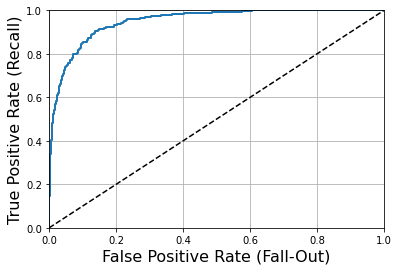

In [21]:
plot_roc_curve(y_q2,y_score_log)

roc_auc_score: 0.9433360557488014


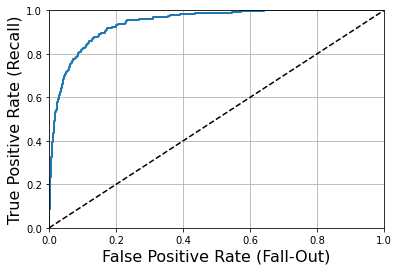

In [22]:
plot_roc_curve(y_q2,y_score_sgd)

Models trained: 

The logistic regression classifier,
 SGDClassifier,
 A logistic regression with the argument class_weight="balanced",
 SGDClassifier with the argument class_weight="balanced".

In [23]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(y_q2,y_score):
    precisions,recalls, thresholds = precision_recall_curve(y_q2,y_score)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)

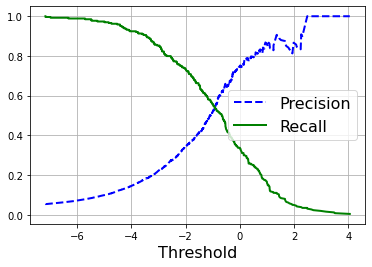

In [24]:
plot_precision_recall_vs_threshold(y_q2,y_score_log)

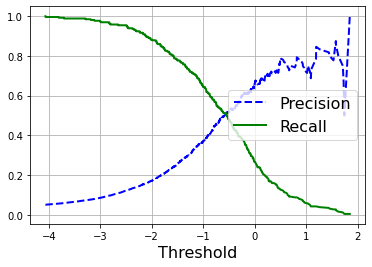

In [25]:
plot_precision_recall_vs_threshold(y_q2,y_score_sgd)

In [26]:
log_reg_bal = LogisticRegression(random_state = 42,class_weight="balanced")
sgd_clf_bal = SGDClassifier(random_state = 42,class_weight="balanced")
y_score_log_bal = cross_val_predict(log_reg_bal,X_q2,y_q2,cv = 10,method ="decision_function")
y_score_sgd_bal = cross_val_predict(sgd_clf_bal,X_q2,y_q2,cv = 10,method ="decision_function")


In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
def threshold_val(y_q2,y_score,model_type):
    precisions,recalls, thresholds = precision_recall_curve(y_q2,y_score)
    threshold_80_recall = thresholds[np.argmax(recalls >= 0.8)]
    y_train_pred_80 = (y_score >= threshold_80_recall)
    prec = precision_score(y_q2,y_train_pred_80)
    print(f"{model_type} \n Threshold : {threshold_80_recall} \n Precision :  {prec}")
    print()

threshold_val(y_q2,y_score_log,"Logistic Regression")
threshold_val(y_q2,y_score_log_bal,"Logistic Regression with balanced weights")
threshold_val(y_q2,y_score_sgd,"SGD Classifier")
threshold_val(y_q2,y_score_sgd_bal,"SGD Classifier with balanced weights")

Logistic Regression 
 Threshold : -7.168864964582788 
 Precision :  0.05340886101557758

Logistic Regression with balanced weights 
 Threshold : -3.7529438988460795 
 Precision :  0.052810562112422486

SGD Classifier 
 Threshold : -4.065059846392796 
 Precision :  0.050555342780543855

SGD Classifier with balanced weights 
 Threshold : -5.4512569350550635 
 Precision :  0.04080370942812983



Looking at the values we can say that Logistic Regression ("without balanced weights") has the best precision

Fit the best classifier to the whole training data, and use it to predict on the test set. 

Output- its accuracy, precision, recall, ROC curve and ROC AUC over the test set

In [30]:
final_model_q2 = log_reg.fit(X_q2,y_q2)

X_test_prepared_q2 = full_pipeline_q2.transform(X_test_q2)

precisions,recalls, thresholds = precision_recall_curve(y_q2,y_score_log)
threshold_80_recall = thresholds[np.argmax(recalls >= 0.8)]
y_score = final_model_q2.decision_function(X_test_prepared_q2)

final_predictions = (y_score > threshold_80_recall)

C:\Users\pragy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy Score: 0.4075
Precision Score: 0.05502392344497608
Recall Score: 1.0
roc_auc_score: 0.9435375528186192


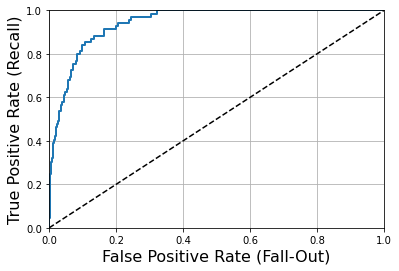

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print(f"Accuracy Score: {accuracy_score(y_test_q2,final_predictions)}")
print(f"Precision Score: {precision_score(y_test_q2,final_predictions)}")
print(f"Recall Score: {recall_score(y_test_q2,final_predictions)}")

plot_roc_curve(y_test_q2,y_score)
